Plot a longitude-time diagramme of Sea level anomalies in the Tropical Pacific during the past 3 years, to show the onset of an El Niño

In [55]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

We start from gridded data over a narrow equatorial band (+/- 2°), covering the whole width of the Pacific Ocean (120-280°E). 
We select data "only" for 2021-2023

In [56]:
# extracted data from CMEMS +/-2° latitude, 120-280°E, over 2021-01-01  - 2023-09-04 (or today)
filename = "data/dataset-duacs-nrt-global-merged-allsat-phy-l4_20210101-20230904.nc"
nc = xr.open_dataset(filename)

# average over the latitudes without NaNs
nclatmean = nc.mean(dim='latitude', skipna=True)

# resample weekly
nclatmean_weekly = nclatmean.resample(time='W', skipna=True).mean()

# it could be interesting to remove seasonal averages... 

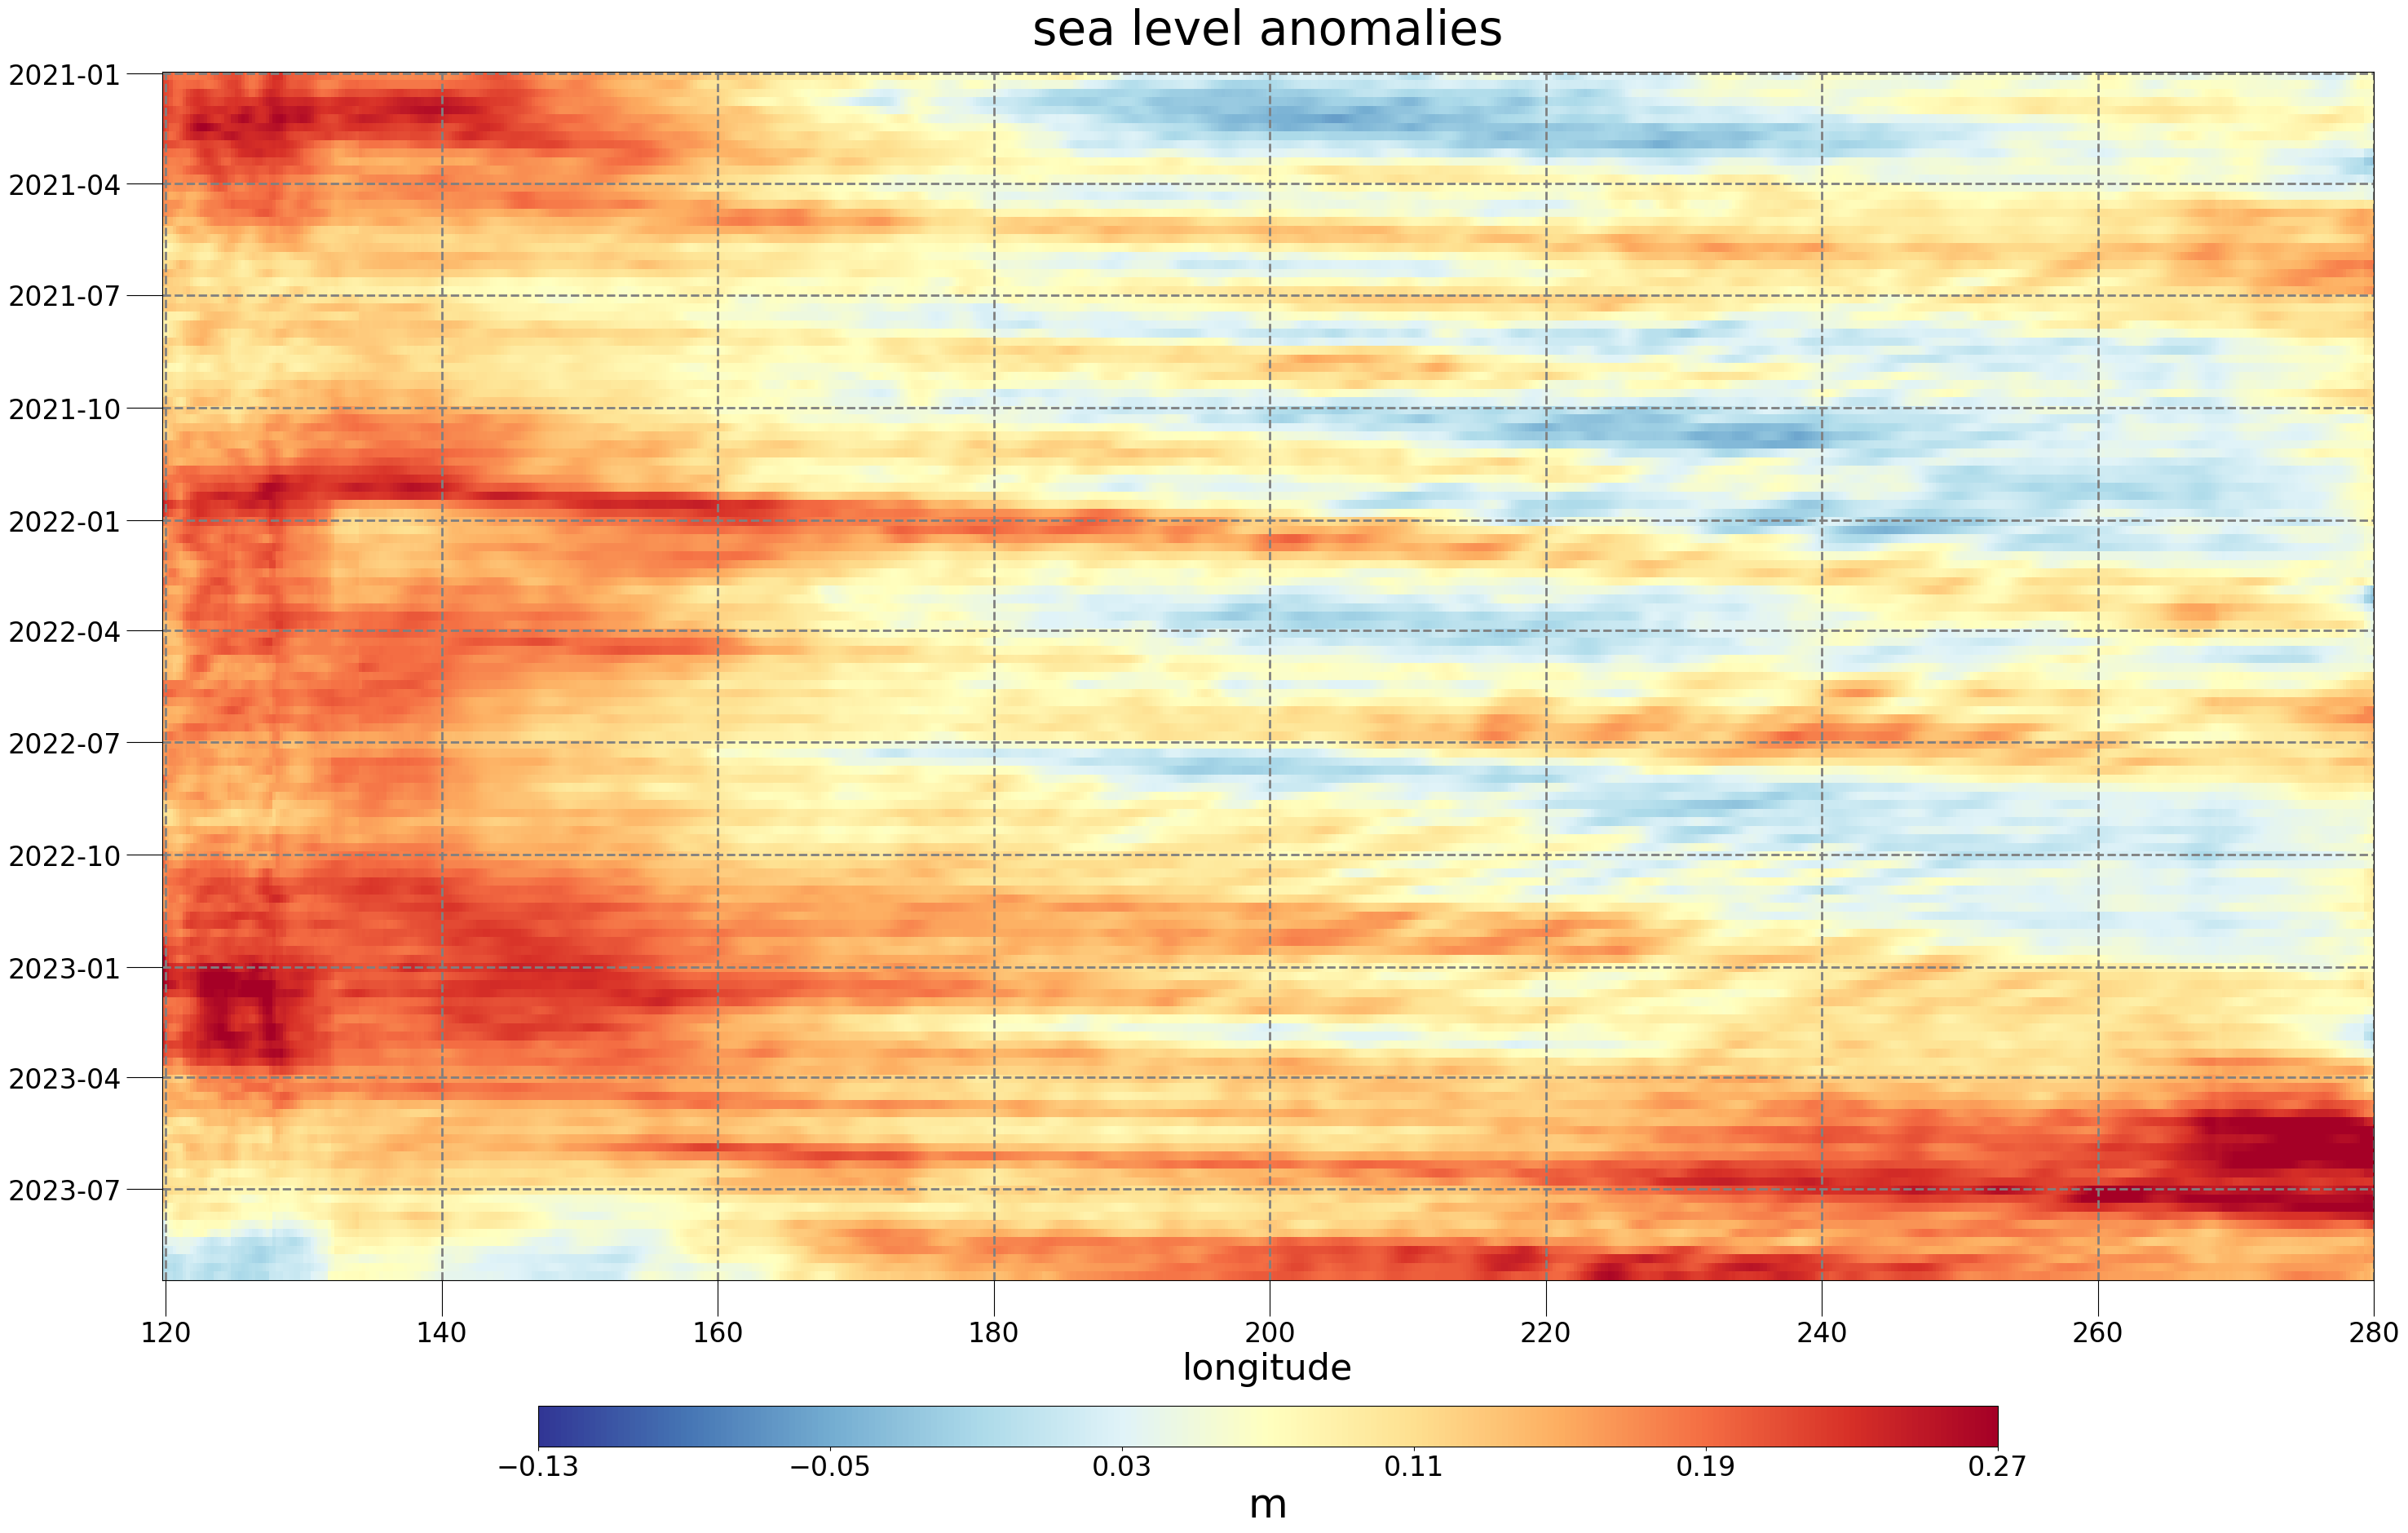

In [57]:
#create a longitude-time grid to plot.
#time2,lon2 = np.meshgrid(nclatmean.longitude, nclatmean.time)
time2,lon2 = np.meshgrid(nclatmean_weekly.longitude, nclatmean_weekly.time)

# define min / max of the color bar
# we shift the colorbar middle in order to balance colors in the plot
# since sla are referenced to a 20-year average, not the current 30+ years available
colormin = -0.2 + 0.07
colormax = 0.2 + 0.07
plt.rc('xtick', labelsize=24) #fontsize of the x tick labels
plt.rc('ytick', labelsize=24) #fontsize of the y tick labels

fig = plt.figure(figsize=(35,25))
ax = fig.add_subplot()
ax.invert_yaxis()
#mm = ax.pcolormesh(time2, lon2, nclatmean.sla, vmin=colormin, vmax=colormax, cmap='RdYlBu_r')
mm = ax.pcolormesh(time2, lon2, nclatmean_weekly.sla, vmin=colormin, vmax=colormax, cmap='RdYlBu_r')
listeticks=np.linspace(colormin,colormax,6)
ax.grid(color='gray', linestyle='--', linewidth=2)
ax.tick_params(axis='both', size=32)
ax.set_xlabel("longitude", size=32)

cbar = fig.colorbar(mm, orientation='horizontal', pad=0.08, shrink=0.66, aspect=36, ticks=listeticks)
cbar.set_label('m', fontsize=36)

ax.set_title('sea level anomalies', size=42, pad=24)

plt.savefig('hovmoller_ENSO_2021-2023.png', dpi=150, bbox_inches='tight', pad_inches=0.01)

The red lines crossing the whole figure are waves crossing the Pacific, and in fact the El Niño phenomena proper. 
Some years you have a slight increase crossing the ocean, especially around December. But the phenomena currently named "El Niño" is the anomalous red line at the bottom, with higher sea level at the eastern boundary of the Ocean.